In [1]:
 import cv2 as cv
import skimage.io
import matplotlib.pyplot as plt

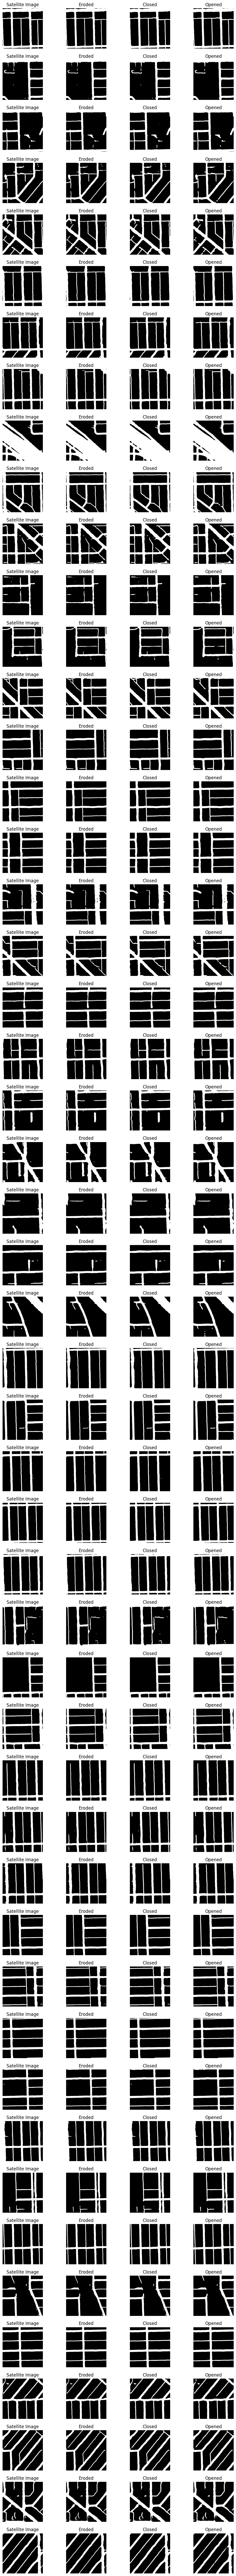

In [2]:
fig, ax = plt.subplots(50, 4, figsize = (10, 100))
plt.tight_layout()
for i in range(0, 50):
    
    # Load image
    name = 'satImage_{:03d}.png'.format(i+1)
    test_img = skimage.io.imread(name)

    # Display image
    ax[i, 0].imshow(test_img, cmap='gray')
    ax[i, 0].set_title('Satellite Image')
    ax[i, 0].axis('off')
    
    # eroded
    eroded = cv.morphologyEx(test_img, cv.MORPH_ERODE, cv.getStructuringElement(cv.MORPH_RECT, (3,3)))
    # Display closed image
    ax[i, 1].imshow(eroded, cmap='gray')
    ax[i, 1].set_title('Eroded')
    ax[i, 1].axis('off')
    
        
    # closing
    closed = cv.morphologyEx(test_img, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_RECT, (9,9)))
    # Display closed image
    ax[i, 2].imshow(closed, cmap='gray')
    ax[i, 2].set_title('Closed')
    ax[i, 2].axis('off')
    
    
    # opening
    opened = cv.morphologyEx(test_img, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT, (9,9)))
    # Display opened image
    ax[i, 3].imshow(opened, cmap='gray')
    ax[i, 3].set_title('Opened')
    ax[i, 3].axis('off')

plt.show()

In [74]:
def remove_isolated_pixels(image):
    # Pixel connectivity (4 for borders connections only, 8 for borders and edges connections)
    connectivity = 8
    
    output = cv.connectedComponentsWithStats(image, connectivity, cv.CV_32S)

    num_stats = output[0]
    labels = output[1]
    stats = output[2]
    #print("num_stats:", num_stats, "\nlabels:", labels, "\nstats:", stats)

    new_image = image.copy()

    for label in range(num_stats):
        # The total area (in pixels) of the connected component (last column of stats)
        if stats[label,cv.CC_STAT_AREA] <= 600:
            new_image[labels == label] = 0

    return new_image

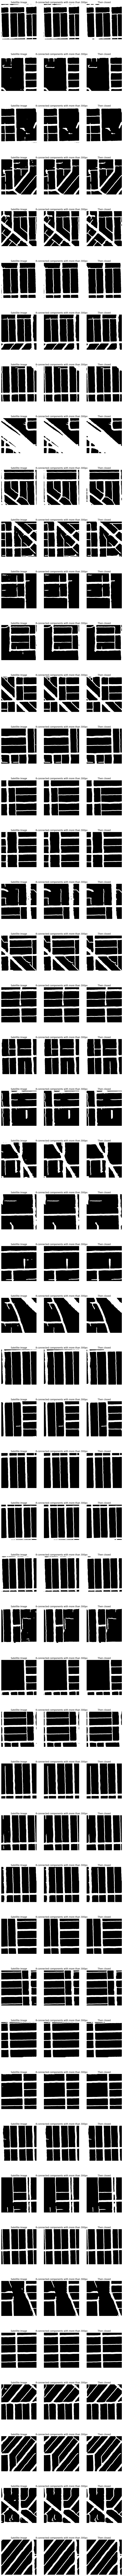

In [75]:
fig, ax = plt.subplots(50, 3, figsize = (10, 200))
plt.tight_layout()
for i in range(0, 50):
    
    # Load image
    name = 'satImage_{:03d}.png'.format(i+1)
    test_img = skimage.io.imread(name)

    # Display image
    ax[i, 0].imshow(test_img, cmap='gray')
    ax[i, 0].set_title('Satellite Image')
    ax[i, 0].axis('off')
    
    
    # Connected
    connected=remove_isolated_pixels(image=test_img)
    ax[i, 1].imshow(connected, cmap='gray')
    ax[i, 1].set_title('8-connected components with more than 300px')
    ax[i, 1].axis('off')
    
    # Then dilated
    closed = cv.morphologyEx(connected, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_RECT, (15,15)))
    #dilated = cv.morphologyEx(dilated, cv.MORPH_DILATE, cv.getStructuringElement(cv.MORPH_RECT, (2,10)))
    # Display closed image
    ax[i, 2].imshow(closed, cmap='gray')
    ax[i, 2].set_title('Then closed')
    ax[i, 2].axis('off')
    
plt.show()